In [1]:
import sys
sys.path.append("../../")
from potential_flows import transforms
from potential_flows import potential
import torch
import time
import numpy as np
from tqdm import tqdm
from torch.nn import functional as F
import matplotlib.pyplot as plt

In [2]:
n = 1000
d_num = 30
d_list = d_list = [int(10*(d+1)) for d in range(d_num)]
time_list = np.zeros(d_num)

In [3]:
def objective_function(x, y, potential_flow):
    return -torch.sum(torch.sum(x*y, dim=-1) - potential_flow.integral(x))

In [4]:
for j, d in enumerate(d_list):

    ## create flow
    layer_affine1 = transforms.PositiveLinear(d)
    layer_spline1 = transforms.RQspline(data_shape=(d,), num_bins=4)
    layer_affine2 = transforms.PositiveLinear(d)
    layer_spline2 = transforms.RQspline(data_shape=(d,), num_bins=4)
    layers = transforms.CompositeTransform([layer_affine1, layer_spline1, layer_affine2, layer_spline2])
    potential_flow = potential.ICRQ(layers, (d,))
    potential_flow.to("cuda")

    ## calculate runtime for 1e3 iterations of objective function

    a, b = torch.ones(n,d).to("cuda"), torch.zeros(n,d).to("cuda")
    t1 = time.perf_counter(), time.process_time()
    with torch.no_grad():
        for i in tqdm(range(100)):
            foo = objective_function(a, b, potential_flow)
    t2 = time.perf_counter(), time.process_time()
    time_list[j] = t2[1] - t1[1]

    print(f"Dimension: {d}, Real time: {t2[0] - t1[0]:.2f} seconds")
    print(f"Dimension: {d}, CPU time: {t2[1] - t1[1]:.2f} seconds")
    print()

/home/medhaaga/OT_flow/potential_flows/flow/../../potential_flows/transforms/utils.py:51: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2425.)
  q, _ = torch.qr(x)
100%|██████████| 100/100 [00:01<00:00, 53.53it/s]


Dimension: 10, Real time: 1.87 seconds
Dimension: 10, CPU time: 1.87 seconds



100%|██████████| 100/100 [00:02<00:00, 46.14it/s]


Dimension: 20, Real time: 2.17 seconds
Dimension: 20, CPU time: 2.19 seconds



100%|██████████| 100/100 [00:02<00:00, 37.10it/s]


Dimension: 30, Real time: 2.70 seconds
Dimension: 30, CPU time: 2.72 seconds



100%|██████████| 100/100 [00:03<00:00, 31.30it/s]


Dimension: 40, Real time: 3.20 seconds
Dimension: 40, CPU time: 3.23 seconds



100%|██████████| 100/100 [00:03<00:00, 26.61it/s]


Dimension: 50, Real time: 3.76 seconds
Dimension: 50, CPU time: 3.79 seconds



100%|██████████| 100/100 [00:04<00:00, 23.53it/s]


Dimension: 60, Real time: 4.25 seconds
Dimension: 60, CPU time: 4.29 seconds



100%|██████████| 100/100 [00:04<00:00, 21.33it/s]


Dimension: 70, Real time: 4.69 seconds
Dimension: 70, CPU time: 4.72 seconds



100%|██████████| 100/100 [00:05<00:00, 18.84it/s]


Dimension: 80, Real time: 5.31 seconds
Dimension: 80, CPU time: 5.35 seconds



100%|██████████| 100/100 [00:05<00:00, 17.35it/s]


Dimension: 90, Real time: 5.77 seconds
Dimension: 90, CPU time: 5.81 seconds



100%|██████████| 100/100 [00:06<00:00, 15.77it/s]


Dimension: 100, Real time: 6.34 seconds
Dimension: 100, CPU time: 6.38 seconds



100%|██████████| 100/100 [00:06<00:00, 14.35it/s]


Dimension: 110, Real time: 6.97 seconds
Dimension: 110, CPU time: 7.01 seconds



100%|██████████| 100/100 [00:07<00:00, 13.51it/s]


Dimension: 120, Real time: 7.40 seconds
Dimension: 120, CPU time: 7.44 seconds



100%|██████████| 100/100 [00:07<00:00, 12.70it/s]


Dimension: 130, Real time: 7.88 seconds
Dimension: 130, CPU time: 7.92 seconds



100%|██████████| 100/100 [00:08<00:00, 11.94it/s]


Dimension: 140, Real time: 8.38 seconds
Dimension: 140, CPU time: 8.42 seconds



100%|██████████| 100/100 [00:08<00:00, 11.21it/s]


Dimension: 150, Real time: 8.92 seconds
Dimension: 150, CPU time: 8.97 seconds



100%|██████████| 100/100 [00:09<00:00, 10.68it/s]


Dimension: 160, Real time: 9.37 seconds
Dimension: 160, CPU time: 9.41 seconds



100%|██████████| 100/100 [00:10<00:00,  9.95it/s]


Dimension: 170, Real time: 10.06 seconds
Dimension: 170, CPU time: 10.10 seconds



100%|██████████| 100/100 [00:10<00:00,  9.19it/s]


Dimension: 180, Real time: 10.89 seconds
Dimension: 180, CPU time: 10.92 seconds



100%|██████████| 100/100 [00:11<00:00,  8.84it/s]


Dimension: 190, Real time: 11.31 seconds
Dimension: 190, CPU time: 11.37 seconds



100%|██████████| 100/100 [00:11<00:00,  8.60it/s]


Dimension: 200, Real time: 11.63 seconds
Dimension: 200, CPU time: 11.69 seconds



100%|██████████| 100/100 [00:12<00:00,  8.17it/s]


Dimension: 210, Real time: 12.24 seconds
Dimension: 210, CPU time: 12.25 seconds



100%|██████████| 100/100 [00:12<00:00,  7.86it/s]


Dimension: 220, Real time: 12.73 seconds
Dimension: 220, CPU time: 12.79 seconds



100%|██████████| 100/100 [00:13<00:00,  7.48it/s]


Dimension: 230, Real time: 13.37 seconds
Dimension: 230, CPU time: 13.39 seconds



100%|██████████| 100/100 [00:13<00:00,  7.24it/s]


Dimension: 240, Real time: 13.82 seconds
Dimension: 240, CPU time: 13.88 seconds



100%|██████████| 100/100 [00:14<00:00,  6.90it/s]


Dimension: 250, Real time: 14.50 seconds
Dimension: 250, CPU time: 14.47 seconds



100%|██████████| 100/100 [00:14<00:00,  6.77it/s]


Dimension: 260, Real time: 14.78 seconds
Dimension: 260, CPU time: 14.83 seconds



100%|██████████| 100/100 [00:15<00:00,  6.44it/s]


Dimension: 270, Real time: 15.53 seconds
Dimension: 270, CPU time: 15.52 seconds



100%|██████████| 100/100 [00:16<00:00,  6.24it/s]


Dimension: 280, Real time: 16.04 seconds
Dimension: 280, CPU time: 16.04 seconds



100%|██████████| 100/100 [00:16<00:00,  6.00it/s]


Dimension: 290, Real time: 16.68 seconds
Dimension: 290, CPU time: 16.69 seconds



100%|██████████| 100/100 [00:17<00:00,  5.83it/s]

Dimension: 300, Real time: 17.16 seconds
Dimension: 300, CPU time: 17.08 seconds



Text(0.5, 1.0, '$O(d), n = 1000$')

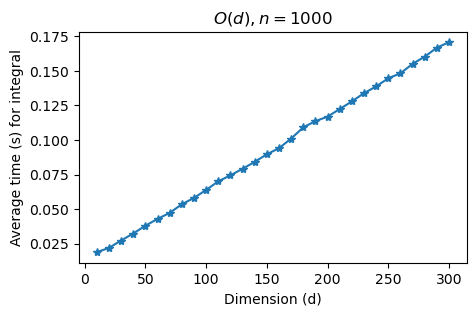

In [10]:
plt.figure(figsize = (5,3))
plt.plot(d_list[:len(time_list)], time_list/100, marker='*')
plt.xlabel("Dimension (d)")
plt.ylabel("Average time (s) for integral")
plt.title(r"$O(d), n = 1000$")

In [6]:
d = 100
n_num = 26
n_list = [int(500 + 100*n) for n in range(n_num)]
n_time_list = np.zeros(n_num)

In [8]:
for j, n in enumerate(n_list):
    ## create flow
    layer_affine1 = transforms.PositiveLinear(d)
    layer_spline1 = transforms.RQspline(data_shape=(d,), num_bins=4)
    layer_affine2 = transforms.PositiveLinear(d)
    layer_spline2 = transforms.RQspline(data_shape=(d,), num_bins=4)
    layers = transforms.CompositeTransform([layer_affine1, layer_spline1, layer_affine2, layer_spline2])
    potential_flow = potential.ICRQ(layers, (d,))
    potential_flow.to("cuda:1")

    ## calculate runtime for 1e3 iterations of objective function

    a, b = torch.ones(n,d).to("cuda:1"), torch.zeros(n,d).to("cuda:1")
    t1 = time.perf_counter(), time.process_time()
    with torch.no_grad():
        for i in tqdm(range(100)):
            foo = objective_function(a, b, potential_flow)
    t2 = time.perf_counter(), time.process_time()
    n_time_list[j] = t2[1] - t1[1]

    print(f"n: {n}, Real time: {t2[0] - t1[0]:.2f} seconds")
    print(f"n: {n}, CPU time: {t2[1] - t1[1]:.2f} seconds")
    print()

100%|██████████| 100/100 [00:03<00:00, 27.84it/s]


n: 500, Real time: 3.59 seconds
n: 500, CPU time: 3.62 seconds



100%|██████████| 100/100 [00:03<00:00, 25.24it/s]


n: 600, Real time: 3.96 seconds
n: 600, CPU time: 3.99 seconds



100%|██████████| 100/100 [00:04<00:00, 22.15it/s]


n: 700, Real time: 4.52 seconds
n: 700, CPU time: 4.56 seconds



100%|██████████| 100/100 [00:05<00:00, 19.46it/s]


n: 800, Real time: 5.14 seconds
n: 800, CPU time: 5.19 seconds



100%|██████████| 100/100 [00:05<00:00, 17.55it/s]


n: 900, Real time: 5.70 seconds
n: 900, CPU time: 5.74 seconds



100%|██████████| 100/100 [00:06<00:00, 16.15it/s]


n: 1000, Real time: 6.19 seconds
n: 1000, CPU time: 6.24 seconds



100%|██████████| 100/100 [00:06<00:00, 14.68it/s]


n: 1100, Real time: 6.82 seconds
n: 1100, CPU time: 6.86 seconds



100%|██████████| 100/100 [00:07<00:00, 13.12it/s]


n: 1200, Real time: 7.63 seconds
n: 1200, CPU time: 7.67 seconds



100%|██████████| 100/100 [00:07<00:00, 12.54it/s]


n: 1300, Real time: 7.98 seconds
n: 1300, CPU time: 8.02 seconds



100%|██████████| 100/100 [00:08<00:00, 11.67it/s]


n: 1400, Real time: 8.57 seconds
n: 1400, CPU time: 8.62 seconds



100%|██████████| 100/100 [00:09<00:00, 10.97it/s]


n: 1500, Real time: 9.12 seconds
n: 1500, CPU time: 9.15 seconds



100%|██████████| 100/100 [00:09<00:00, 10.16it/s]


n: 1600, Real time: 9.84 seconds
n: 1600, CPU time: 9.89 seconds



100%|██████████| 100/100 [00:10<00:00,  9.57it/s]


n: 1700, Real time: 10.46 seconds
n: 1700, CPU time: 10.51 seconds



100%|██████████| 100/100 [00:11<00:00,  8.98it/s]


n: 1800, Real time: 11.13 seconds
n: 1800, CPU time: 11.19 seconds



100%|██████████| 100/100 [00:11<00:00,  8.50it/s]


n: 1900, Real time: 11.77 seconds
n: 1900, CPU time: 11.84 seconds



100%|██████████| 100/100 [00:12<00:00,  8.26it/s]


n: 2000, Real time: 12.11 seconds
n: 2000, CPU time: 12.16 seconds



100%|██████████| 100/100 [00:12<00:00,  7.85it/s]


n: 2100, Real time: 12.74 seconds
n: 2100, CPU time: 12.81 seconds



100%|██████████| 100/100 [00:13<00:00,  7.41it/s]


n: 2200, Real time: 13.51 seconds
n: 2200, CPU time: 13.53 seconds



100%|██████████| 100/100 [00:13<00:00,  7.17it/s]


n: 2300, Real time: 13.95 seconds
n: 2300, CPU time: 14.01 seconds



100%|██████████| 100/100 [00:14<00:00,  6.86it/s]


n: 2400, Real time: 14.59 seconds
n: 2400, CPU time: 14.65 seconds



100%|██████████| 100/100 [00:15<00:00,  6.61it/s]


n: 2500, Real time: 15.14 seconds
n: 2500, CPU time: 15.21 seconds



100%|██████████| 100/100 [00:15<00:00,  6.36it/s]


n: 2600, Real time: 15.71 seconds
n: 2600, CPU time: 15.74 seconds



100%|██████████| 100/100 [00:16<00:00,  6.20it/s]


n: 2700, Real time: 16.13 seconds
n: 2700, CPU time: 16.20 seconds



100%|██████████| 100/100 [00:16<00:00,  5.91it/s]


n: 2800, Real time: 16.93 seconds
n: 2800, CPU time: 16.96 seconds



100%|██████████| 100/100 [00:17<00:00,  5.79it/s]


n: 2900, Real time: 17.27 seconds
n: 2900, CPU time: 17.33 seconds



100%|██████████| 100/100 [00:17<00:00,  5.59it/s]

n: 3000, Real time: 17.90 seconds
n: 3000, CPU time: 17.92 seconds



Text(0.5, 1.0, '$O(n), d = 100$')

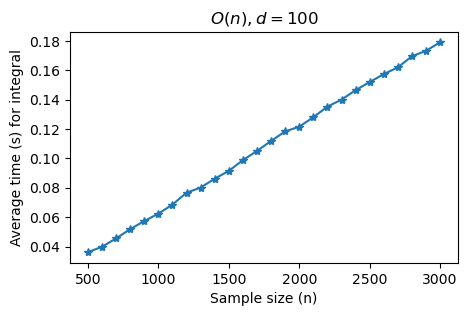

In [9]:
plt.figure(figsize = (5,3))
plt.plot(n_list, n_time_list/100, marker='*')
plt.xlabel("Sample size (n)")
plt.ylabel("Average time (s) for integral")
plt.title(r"$O(n), d = 100$")